In [ ]:
question 1: （1）The differences of standard error of the mean and standard deviation are that firstly，the standard deviation applies to the variability within a single dataset, while the standard error of the mean applies to the variability of sample means across multiple samples.
What's more, the standard deviation tells us about the spread of individual data points, whereas the standard error of the mean tells us about the accuracy of the sample mean as an estimate of the population mean.
Last but not least, the standard error of the mean is always smaller than the standard deviation because it is divided by the square root of the sample size, reflecting that larger samples provide more precise estimates of the population mean.
（2）The distinct ideas are that the standard deviation tells us about the variability within a dataset, while the standard error of the mean tells us about the accuracy of our estimate of the population mean based on our sample

In [ ]:
question 2:
1. Calculate the Sample Mean
2. Calculate the Standard Error of the Mean (SEM)
3. Determine the Z-Score for 95% Confidence: for a 95% confidence interval, the Z-score is approximately 1.96. This value corresponds to the critical value that captures the central 95% of the standard normal distribution.
4. Calculate the Margin of Error (ME): ME=1.96×SEM
5. Construct the Confidence Interval: CI=x±ME
This results in:
Lower Bound=x−ME
Upper Bound=x+ME

In [ ]:
question 3:
1. Resample with Replacement: Generate a large number of bootstrap samples (e.g., 1000 or more) from your original dataset. Each bootstrap sample should be the same size as the original dataset and is created by sampling with replacement.
2. Calculate the Sample Mean for Each Bootstrap Sample: Compute the mean of each bootstrap sample. This will give you a distribution of bootstrap sample means.
3. Sort the Bootstrap Sample Means: Arrange the bootstrap sample means in ascending order.
4. Determine the Percentiles: To create a 95% confidence interval, you need to find the 2.5th percentile and the 97.5th percentile of the sorted bootstrap sample means. These percentiles correspond to the lower and upper bounds of the confidence interval respectively.

In [ ]:
question 4:

In [1]:
import numpy as np

# Sample data
sample = np.array([5, 7, 9, 10, 6, 8, 12, 11, 14, 6])

# Number of bootstrap samples
n_bootstrap = 10000
np.random.seed(42)  # Set a seed for reproducibility

# Function to calculate a bootstrap confidence interval
def bootstrap_confidence_interval(data, stat_function=np.mean, n_bootstrap=10000, ci=95):
    """
    Calculate a bootstrap confidence interval for a given statistic.

    Parameters:
    - data: the sample data (numpy array or list)
    - stat_function: the statistic function to apply to bootstrap samples (default is np.mean)
    - n_bootstrap: number of bootstrap resamples (default is 10,000)
    - ci: confidence level for the interval (default is 95 for a 95% CI)

    Returns:
    - The lower and upper bounds of the confidence interval.
    """
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)
    bootstrap_statistics = np.apply_along_axis(stat_function, axis=1, arr=bootstrap_samples)
    
    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Calculate 95% confidence interval for the mean
mean_ci = bootstrap_confidence_interval(sample)
print(f"95% Bootstrap Confidence Interval for the mean: {mean_ci}")

# How to change the code to calculate a 95% CI for the median:
# Change the stat_function parameter from np.mean to np.median.

# Calculate 95% confidence interval for the median
median_ci = bootstrap_confidence_interval(sample, stat_function=np.median)
print(f"95% Bootstrap Confidence Interval for the median: {median_ci}")

95% Bootstrap Confidence Interval for the mean: (7.1, 10.5)
95% Bootstrap Confidence Interval for the median: (6.0, 11.0)


In [ ]:
question 5:Distinguishing between population parameters and sample statistics is crucial for confidence intervals because population parameters represent the true values for the entire population, while sample statistics are estimates derived from a subset of the population.
Confidence intervals use sample statistics to estimate the range within which the population parameter likely falls. This distinction ensures that we understand we’re making inferences about the population based on sample data, acknowledging the inherent uncertainty and variability.

In [ ]:
question 6:
1. bootstrapping lets us make the most out of the data we already have by creating lots of new “fake” samples from it. It’s like trying to imagine different versions of our data without actually collecting new information. Here’s how it works:
(1)Start with What You’ve Got: Say you have a small group of exam scores, like 10 students' scores: 75, 80, 85, 90, and so on. This is your sample—the data you collected.
(2)Resample the Data: Now, you take this group of 10 scores, and you randomly pick scores from it to create a new set of 10 scores. Here’s the trick: after you pick a score, you put it back in the group, so it can get picked again (this is called sampling with replacement). So, maybe you pick 85, then 90, then 75, and you might even pick 85 again! This gives you a new “fake” dataset based on the original.
(3)Do This Many, Many Times: You repeat this process hundreds or even thousands of times. Each time, you create a new version of your dataset by picking scores at random from your original sample. You now have hundreds or thousands of these new “datasets,” each slightly different from the others because they were created randomly.
(4)Calculate What You Care About: For each new dataset you create, you calculate the statistic you’re interested in—like the average score. After repeating this process many times, you end up with hundreds or thousands of different averages.
(5)Look at the Results: Now that you have lots of different averages, you can look at how they are spread out. This gives you a sense of how much the average could change if you kept collecting new data. Essentially, it helps you see how much uncertainty there is in your original sample’s average.
(6)Confidence Interval: Using these bootstrapped averages, you can also calculate something called a confidence interval. A confidence interval is just a range of values that tells you, “Hey, I’m pretty sure the true average (or whatever you're interested in) is somewhere between these two numbers.” For example, you might find that 95% of the time, the average score in your bootstrapped samples falls between 70 and 85. So you can be fairly confident that the true average score for all students is between 70 and 85.
2. The main purpose of bootstrapping is that it lets you take your small sample and use it to estimate things about the larger group, even if you can’t gather more data from everyone in the population.
The whole idea is to give you a sense of how reliable your sample result is. So, if you’re estimating an average, bootstrapping shows you how much that average might change if you collected more data. It helps you measure uncertainty and gives you a way to say, “Based on my sample, I’m pretty confident the true average height is somewhere between X and Y.”
3. (1)Take Your Sample: You already have your sample of 30 students' heights, and you’ve calculated the sample average, say it’s 67 inches. So right away, your guess (65 inches) is a bit different from your sample’s average (67 inches), but how do you know if that difference is just random, or if your guess is really off?
(2)Resample Using Bootstrapping: You use bootstrapping to create a whole bunch of new "fake" samples by randomly picking heights from your original 30 students with replacement. You do this like 10,000 times, so you now have 10,000 different bootstrapped samples, each a little different from the others.
(3)Calculate New Means: For each of those 10,000 bootstrapped samples, you calculate the average height. This gives you a whole distribution of average heights that could have come from your sample of 30 students.
(4)Compare to Your Hypothesis: Now you have a distribution of 10,000 different averages. Here’s the key part: You check where your hypothesized average of 65 inches falls in this distribution of bootstrapped averages.If the value 65 inches is somewhere in the middle of the bootstrapped averages, it suggests that your guess could be reasonable—it’s within the range of averages you might expect based on the data.
But if the value 65 inches is way outside of most of the bootstrapped averages (like in the far tail of the distribution or not even close), then that’s a sign your guess might not be very plausible.
(5)Confidence Interval Check: You can also use bootstrapping to build a confidence interval for the average. If your hypothesized 65 inches falls inside the confidence interval (let’s say, between 64 and 68 inches), then your guess might be plausible. But if 65 inches falls outside that interval, it’s a good sign that your guess is likely wrong based on the data you have.

In [ ]:
question 7: A confidence interval overlapping zero means that zero is a plausible value for the population parameter. This implies that there is not enough evidence to conclude that the true parameter is different from zero, leading us to fail to reject the null hypothesis.
Conversely, if the confidence interval does not overlap zero, it suggests that zero is not a plausible value for the population parameter. This provides sufficient evidence to conclude that the true parameter is different from zero, leading us to reject the null hypothesis.

In [ ]:
question 8:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset as per the given instruction
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display the dataframe
print(df)


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


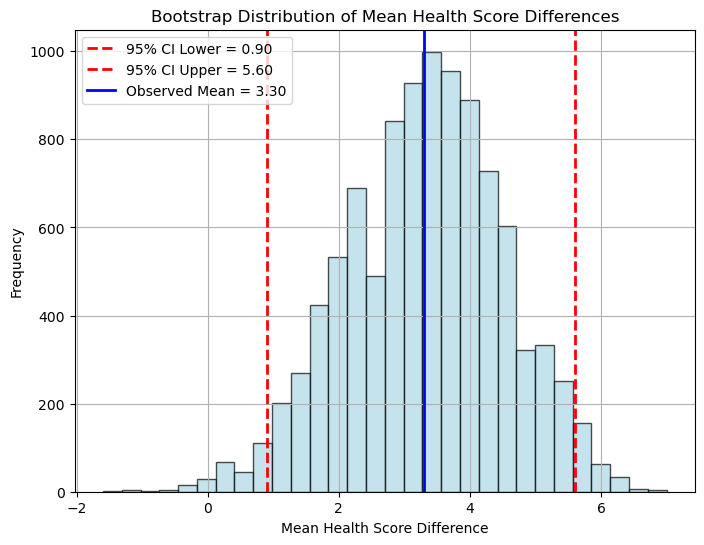

(0.9, 5.6)

In [4]:
# Set seed for reproducibility
np.random.seed(42)

# Calculate the observed differences between final and initial health scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Number of bootstrap samples
n_bootstrap = 10000

# Function to perform bootstrapping
def bootstrap_mean_differences(data, n_bootstrap=10000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return np.array(bootstrap_means)

# Bootstrap the mean differences
bootstrap_means = bootstrap_mean_differences(df['ScoreDifference'])

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Plot the distribution of bootstrap mean differences
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label=f'95% CI Lower = {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label=f'95% CI Upper = {upper_bound:.2f}')
plt.axvline(np.mean(df['ScoreDifference']), color='blue', linestyle='solid', linewidth=2, label=f'Observed Mean = {np.mean(df["ScoreDifference"]):.2f}')
plt.title('Bootstrap Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Display confidence interval
lower_bound, upper_bound

In [ ]:
question 9: yes

In [ ]:
summary of chatbox session: In today's session, we analyzed a vaccine dataset to assess whether the vaccine improved patient health by comparing initial and final health scores. Using a null hypothesis of "no effect," we visualized the data and applied bootstrapping to calculate a 95% confidence interval for the mean difference in health scores. The confidence interval, ranging from 0.9 to 5.6, did not include zero, allowing us to reject the null hypothesis and conclude that the vaccine had a statistically significant positive effect. Further analysis with larger samples and exploring demographic factors could provide deeper insights.

In [ ]:
chatbox link: https://chatgpt.com/share/66ff65aa-9200-800c-af20-99cde4953d46